## 0. Load Required Libraries

In [96]:
# !pip install imblearn

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import src.util as util
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## 1. Import Configuration File

In [98]:
config_data = util.load_config()

## 2. Load Dataset

In [100]:
def load_dataset(config_data: dict) -> pd.DataFrame:
    # Load every set of data
    x_train = util.pickle_load(config_data["train_set_path"][0])
    y_train = util.pickle_load(config_data["train_set_path"][1])

    x_valid = util.pickle_load(config_data["valid_set_path"][0])
    y_valid = util.pickle_load(config_data["valid_set_path"][1])

    x_test = util.pickle_load(config_data["test_set_path"][0])
    y_test = util.pickle_load(config_data["test_set_path"][1])

    # Concatenate x and y each set
    train_set = pd.concat([x_train, y_train], axis = 1)
    valid_set = pd.concat([x_valid, y_valid], axis = 1)
    test_set = pd.concat([x_test, y_test], axis = 1)

    # Return 3 set of data
    return train_set, valid_set, test_set

In [101]:
train_set, valid_set, test_set = load_dataset(config_data)

## 3. Join Categories

In [33]:
def join_label_categori(set_data, config_data):
    # Check if label not found in set data
    if config_data["label"] in set_data.columns.to_list():
        # Create copy of set data
        set_data = set_data.copy()

        # Rename sedang to tidak sehat
        set_data.categori.replace(config_data["label_categories"][1], config_data["label_categories"][2], inplace = True)

        # Renam tidak sehat to tidak baik
        set_data.categori.replace(config_data["label_categories"][2], config_data["label_categories_new"][1], inplace = True)

        # Return renamed set data
        return set_data
    else:
        raise RuntimeError("Kolom label tidak terdeteksi pada set data yang diberikan!")

### 3.1. Train Set

In [49]:
train_set.continent.value_counts()

Africa           504
Europe           432
Asia             381
North America    181
South America    132
Oceania           95
Name: continent, dtype: int64

In [8]:
train_set = join_label_categori(train_set, config_data)

In [9]:
train_set.categori.value_counts()

TIDAK BAIK    1137
BAIK           132
Name: categori, dtype: int64

### 3.2. Valid Set

In [10]:
valid_set.categori.value_counts()

SEDANG         196
TIDAK SEHAT     48
BAIK            28
Name: categori, dtype: int64

In [11]:
valid_set = join_label_categori(valid_set, config_data)

In [12]:
valid_set.categori.value_counts()

TIDAK BAIK    244
BAIK           28
Name: categori, dtype: int64

### 3.3. Test Set

In [13]:
test_set.categori.value_counts()

SEDANG         195
TIDAK SEHAT     48
BAIK            29
Name: categori, dtype: int64

In [14]:
test_set = join_label_categori(test_set, config_data)

In [15]:
test_set.categori.value_counts()

TIDAK BAIK    243
BAIK           29
Name: categori, dtype: int64

## 4. Handling Missing Value

In [102]:
def nan_detector(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Replace -1 with NaN
    set_data.replace(-1, np.nan, inplace = True)

    # Return replaced set data
    return set_data

### 4.1. Convert -1 to NaN

#### 4.1.1. Train Set

In [103]:
train_set.describe()

,hdi,EFConsPerCap
count,1725.000000,1725.000000
mean,0.663634,3.312210
std,0.168019,2.566883
min,0.261000,0.428228
25%,0.520000,1.421106
50%,0.692000,2.410972
75%,0.798000,4.733861
max,0.945000,17.021936


In [18]:
train_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [19]:
train_set = nan_detector(train_set)

In [20]:
train_set.isnull().sum()

stasiun      0
pm10        35
pm25        55
so2         68
co          10
o3          35
no2          9
categori     0
dtype: int64

#### 4.1.2. Valid Set

In [51]:
valid_set.describe()

,hdi,EFConsPerCap
count,345.000000,345.000000
mean,0.667125,3.476903
std,0.174083,2.854837
min,0.255000,0.468001
25%,0.501000,1.378405
50%,0.697000,2.492806
75%,0.812000,4.768094
max,0.948000,15.653982


In [22]:
valid_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [23]:
valid_set = nan_detector(valid_set)

In [24]:
valid_set.isnull().sum()

stasiun      0
pm10         9
pm25        13
so2         15
co           3
o3           3
no2          4
categori     0
dtype: int64

#### 4.1.3. Test Set

In [25]:
test_set.describe()

,pm10,pm25,so2,co,o3,no2
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,51.121324,73.444853,32.360294,11.816176,31.194853,18.669118
std,18.589466,29.945903,14.567148,5.170456,16.550122,8.879725
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,40.000000,59.000000,23.000000,9.000000,21.000000,13.000000
50%,54.000000,76.000000,32.000000,11.000000,28.000000,18.000000
75%,61.000000,91.000000,43.000000,14.000000,38.250000,24.000000
max,179.000000,150.000000,64.000000,44.000000,93.000000,49.000000


In [26]:
test_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

In [27]:
test_set = nan_detector(test_set)

In [28]:
test_set.isnull().sum()

stasiun      0
pm10         9
pm25        18
so2         14
co           3
o3          10
no2          6
categori     0
dtype: int64

### 4.2. Handling in PM10

#### 4.2.1. Train Set

In [29]:
# Extract mean value from pm10 by target label
impute_1 = int(train_set[train_set.categori == "BAIK"].pm10.mean())
impute_0 = int(train_set[train_set.categori == "TIDAK BAIK"].pm10.mean())

In [30]:
# Check the value
impute_1, impute_0

(28, 55)

In [31]:
# Check number of null value
train_set[train_set.categori == "BAIK"].pm10.isnull().sum(), train_set[train_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(5, 30)

In [32]:
# Replace NaN
train_set.loc[train_set[(train_set.categori == "BAIK") & (train_set.pm10.isnull() == True)].index, "pm10"] = impute_1
train_set.loc[train_set[(train_set.categori == "TIDAK BAIK") & (train_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [33]:
# Check number of null value after imputation
train_set[train_set.categori == "BAIK"].pm10.isnull().sum(), train_set[train_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

#### 4.2.2. Valid Set

In [34]:
valid_set[valid_set.categori == "BAIK"].pm10.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(2, 7)

In [35]:
valid_set.loc[valid_set[(valid_set.categori == "BAIK") & (valid_set.pm10.isnull() == True)].index, "pm10"] = impute_1
valid_set.loc[valid_set[(valid_set.categori == "TIDAK BAIK") & (valid_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [36]:
valid_set[valid_set.categori == "BAIK"].pm10.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

#### 4.2.3. Test Set

In [37]:
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(3, 6)

In [38]:
test_set.loc[test_set[(test_set.categori == "BAIK") & (test_set.pm10.isnull() == True)].index, "pm10"] = impute_1
test_set.loc[test_set[(test_set.categori == "TIDAK BAIK") & (test_set.pm10.isnull() == True)].index, "pm10"] = impute_0

In [39]:
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

### 5.3. Handling in PM25

#### 5.3.1. Train Set

In [40]:
impute_1 = int(train_set[train_set.categori == "BAIK"].pm25.mean())
impute_0 = int(train_set[train_set.categori == "TIDAK BAIK"].pm25.mean())

In [41]:
impute_1, impute_0

(38, 82)

In [42]:
train_set[train_set.categori == "BAIK"].pm25.isnull().sum(), train_set[train_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(35, 20)

In [43]:
train_set.loc[train_set[(train_set.categori == "BAIK") & (train_set.pm25.isnull() == True)].index, "pm25"] = impute_1
train_set.loc[train_set[(train_set.categori == "TIDAK BAIK") & (train_set.pm25.isnull() == True)].index, "pm25"] = impute_0

In [44]:
train_set[train_set.categori == "BAIK"].pm10.isnull().sum(), train_set[train_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

#### 5.3.2. Valid Set

In [45]:
valid_set[valid_set.categori == "BAIK"].pm25.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(5, 8)

In [46]:
valid_set.loc[valid_set[(valid_set.categori == "BAIK") & (valid_set.pm25.isnull() == True)].index, "pm25"] = impute_1
valid_set.loc[valid_set[(valid_set.categori == "TIDAK BAIK") & (valid_set.pm25.isnull() == True)].index, "pm25"] = impute_0

In [47]:
valid_set[valid_set.categori == "BAIK"].pm25.isnull().sum(), valid_set[valid_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(0, 0)

#### 5.3.3. Test Set

In [48]:
test_set[test_set.categori == "BAIK"].pm25.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm25.isnull().sum()

(10, 8)

In [49]:
test_set.loc[test_set[(test_set.categori == "BAIK") & (test_set.pm25.isnull() == True)].index, "pm25"] = impute_1
test_set.loc[test_set[(test_set.categori == "TIDAK BAIK") & (test_set.pm25.isnull() == True)].index, "pm25"] = impute_0

In [50]:
test_set[test_set.categori == "BAIK"].pm10.isnull().sum(), test_set[test_set.categori == "TIDAK BAIK"].pm10.isnull().sum()

(0, 0)

### 5.4. Handling in SO2, CO, O3, dan NO2

#### 5.4.1. Train Set

In [51]:
impute_so2 = int(train_set.so2.mean())
impute_co = int(train_set.co.median())
impute_o3 = int(train_set.o3.median())
impute_no2 = int(train_set.no2.median())


In [52]:
impute_values = {"so2" : impute_so2, "co" : impute_co, "o3" : impute_o3, "no2" : impute_no2}
impute_values

{'so2': 35, 'co': 11, 'o3': 29, 'no2': 18}

In [53]:
train_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         68
co          10
o3          35
no2          9
categori     0
dtype: int64

In [54]:
train_set.fillna(value = impute_values, inplace = True)

In [55]:
train_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

#### 5.4.2. Valid Set

In [56]:
valid_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         15
co           3
o3           3
no2          4
categori     0
dtype: int64

In [57]:
valid_set.fillna(value = impute_values, inplace = True)

In [58]:
valid_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

#### 5.4.3. Test Set

In [59]:
test_set.isnull().sum()

stasiun      0
pm10         0
pm25         0
so2         14
co           3
o3          10
no2          6
categori     0
dtype: int64

In [60]:
test_set.fillna(value = impute_values, inplace = True)

In [61]:
test_set.isnull().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

## 5. Encoding Stasiun

### 5.1. Prepare Replacement for Columns Name

In [62]:
# # Create mapping dict for replacement
#replacement_stasiun = dict(zip(list(config_data["range_continent"]), list(config_data["range_stasiun_str"])))

In [63]:
# # Replacing data
# train_set.stasiun = train_set.stasiun.map(replacement_stasiun)
# valid_set.stasiun = valid_set.stasiun.map(replacement_stasiun)
# test_set.stasiun = test_set.stasiun.map(replacement_stasiun)

### 5.1. Fit OHE to Stasiun Data

In [104]:
def ohe_fit(data_tobe_fitted: dict, ohe_path: str) -> OneHotEncoder:
    # Create ohe object
    ohe_continent = OneHotEncoder(sparse = False)

    # Fit ohe
    ohe_continent.fit(np.array(data_tobe_fitted).reshape(-1, 1))

    # Save ohe object
    util.pickle_dump(ohe_continent, ohe_path)

    # Return trained ohe
    return ohe_continent

In [106]:
def ohe_transform(set_data: pd.DataFrame, tranformed_column: str, ohe_path: str) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Load ohe stasiun
    ohe_continent = util.pickle_load(ohe_path)

    # Transform variable stasiun of set data, resulting array
    continent_features = ohe_continent.transform(np.array(set_data[tranformed_column].to_list()).reshape(-1, 1))

    # Convert to dataframe
    continent_features = pd.DataFrame(continent_features.tolist(), columns = list(ohe_continent.categories_[0]))

    # Set index by original set data index
    continent_features.set_index(set_data.index, inplace = True)

    # Concatenate new features with original set data
    set_data = pd.concat([continent_features, set_data], axis = 1)

    # Drop stasiun column
    #set_data.drop(columns = "continent", inplace = True)

    # Convert columns type to string
    new_col = [str(col_name) for col_name in set_data.columns.to_list()]
    set_data.columns = new_col

    # Return new feature engineered set data
    return set_data

In [107]:
ohe_continent = ohe_fit(config_data["range_continent"], config_data["ohe_continent_path"])

### 5.2. Train Set

In [108]:
train_set = ohe_transform(train_set, "continent", config_data["ohe_continent_path"])

In [109]:
train_set

,Africa,Asia,Europe,North America,Oceania,South America,hdi,continent,EFConsPerCap
471,1.0,0.0,0.0,0.0,0.0,0.0,0.413,Africa,1.055530
925,0.0,0.0,1.0,0.0,0.0,0.0,0.910,Europe,4.602575
322,1.0,0.0,0.0,0.0,0.0,0.0,0.456,Africa,1.065831
168,0.0,0.0,0.0,1.0,0.0,0.0,0.757,North America,4.614050
1170,1.0,0.0,0.0,0.0,0.0,0.0,0.366,Africa,0.738863
...,...,...,...,...,...,...,...,...,...
183,0.0,0.0,1.0,0.0,0.0,0.0,0.703,Europe,3.957488
783,0.0,0.0,0.0,1.0,0.0,0.0,0.578,North America,1.763312
1422,0.0,0.0,0.0,1.0,0.0,0.0,0.577,North America,1.709146
1993,0.0,0.0,1.0,0.0,0.0,0.0,0.658,Europe,2.339436


### 5.3. Valid Set

In [65]:
valid_set = ohe_transform(valid_set, "continent", config_data["ohe_continent_path"])

### 5.4. Test Set

In [66]:
test_set = ohe_transform(test_set, "continent", config_data["ohe_continent_path"])

## 6. Balancing Label

<Axes: xlabel='continent', ylabel='Count'>

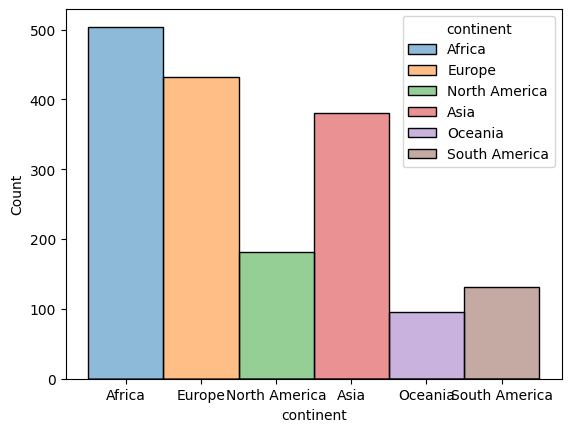

In [110]:
sns.histplot(data = train_set, x = "continent", hue = "continent")

In [69]:
train_set

,Africa,Asia,Europe,North America,Oceania,South America,hdi,EFConsPerCap
471,1.0,0.0,0.0,0.0,0.0,0.0,0.413,1.055530
925,0.0,0.0,1.0,0.0,0.0,0.0,0.910,4.602575
322,1.0,0.0,0.0,0.0,0.0,0.0,0.456,1.065831
168,0.0,0.0,0.0,1.0,0.0,0.0,0.757,4.614050
1170,1.0,0.0,0.0,0.0,0.0,0.0,0.366,0.738863
...,...,...,...,...,...,...,...,...
183,0.0,0.0,1.0,0.0,0.0,0.0,0.703,3.957488
783,0.0,0.0,0.0,1.0,0.0,0.0,0.578,1.763312
1422,0.0,0.0,0.0,1.0,0.0,0.0,0.577,1.709146
1993,0.0,0.0,1.0,0.0,0.0,0.0,0.658,2.339436


### 6.1. Undersampling

In [111]:
def rus_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 26)

    # Balancing set data
    x_rus, y_rus = rus.fit_resample(set_data.drop("continent", axis = 1), set_data.continent)

    # Concatenate balanced data
    set_data_rus = pd.concat([x_rus, y_rus], axis = 1)

    # Return balanced data
    return set_data_rus

In [112]:
train_set_rus = rus_fit_resample(train_set)

<Axes: xlabel='continent', ylabel='Count'>

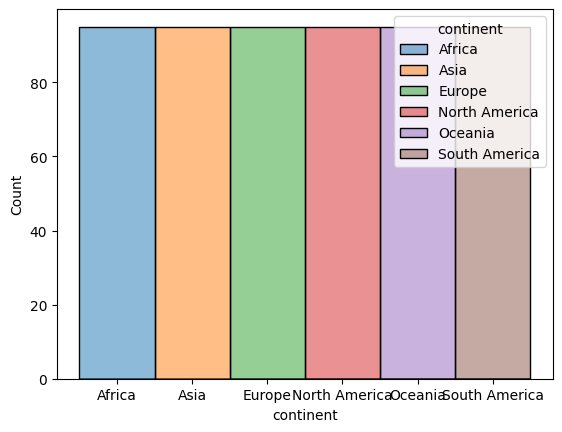

In [113]:
sns.histplot(train_set_rus, x = "continent", hue = "continent")

### 6.2. Oversampling

In [85]:
def ros_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 11)

    # Balancing set data
    x_ros, y_ros = ros.fit_resample(set_data.drop("continent", axis = 1), set_data.continent)

    # Concatenate balanced data
    set_data_ros = pd.concat([x_ros, y_ros], axis = 1)

    # Return balanced data
    return set_data_ros

In [86]:
train_set_ros = ros_fit_resample(train_set)

In [95]:
train_set_ros

,hdi,EFConsPerCap,continent
0,0.413,1.055530,Africa
1,0.910,4.602575,Europe
2,0.456,1.065831,Africa
3,0.757,4.614050,North America
4,0.366,0.738863,Africa
...,...,...,...
3019,0.725,2.305922,South America
3020,0.624,2.619154,South America
3021,0.648,2.974306,South America
3022,0.784,4.051971,South America


<Axes: xlabel='continent', ylabel='Count'>

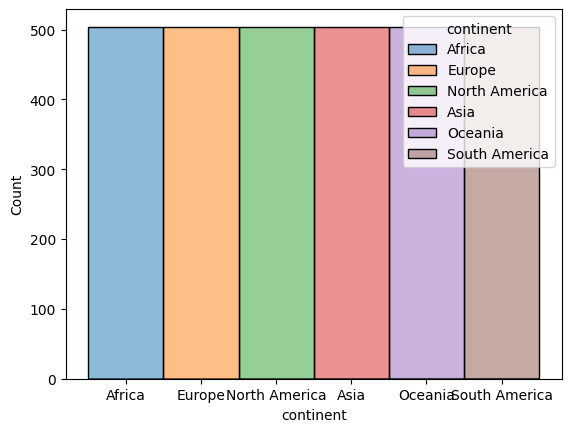

In [89]:
sns.histplot(train_set_ros, x = "continent", hue = "continent")

### 6.3. SMOTE

In [92]:
def sm_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    sm = SMOTE(random_state = 112)

    # Balancing set data
    x_sm, y_sm = sm.fit_resample(set_data.drop("continent", axis = 1), set_data.continent)

    # Concatenate balanced data
    set_data_sm = pd.concat([x_sm, y_sm], axis = 1)

    # Return balanced data
    return set_data_sm

In [93]:
train_set_sm = sm_fit_resample(train_set)

<Axes: xlabel='continent', ylabel='Count'>

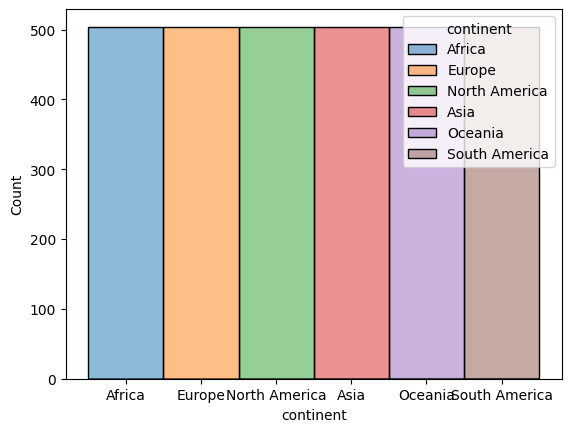

In [94]:
sns.histplot(train_set_sm, x = "continent", hue = "continent")

## 7. Label Encoding

### 7.1. Fit LE to Label Data

In [114]:
def le_fit(data_tobe_fitted: dict, le_path: str) -> LabelEncoder:
    # Create le object
    le_encoder = LabelEncoder()

    # Fit le
    le_encoder.fit(data_tobe_fitted)

    # Save le object
    util.pickle_dump(le_encoder, le_path)

    # Return trained le
    return le_encoder

In [115]:
le_encoder = le_fit(config_data["label_categories_new"], config_data["le_encoder_path"])

KeyError: 'label_categories_new'

In [82]:
def le_transform(label_data: pd.Series, config_data: dict) -> pd.Series:
    # Create copy of label_data
    label_data = label_data.copy()

    # Load le encoder
    le_encoder = util.pickle_load(config_data["le_encoder_path"])

    # If categories both label data and trained le matched
    if len(set(label_data.unique()) - set(le_encoder.classes_) | set(le_encoder.classes_) - set(label_data.unique())) == 0:
        # Transform label data
        label_data = le_encoder.transform(label_data)
    else:
        raise RuntimeError("Check category in label data and label encoder.")
    
    # Return transformed label data
    return label_data


### 7.2. Undersampling set

In [83]:
train_set_rus.categori = le_transform(train_set_rus.categori, config_data)


### 7.3. Oversampling set

In [84]:
train_set_ros.categori = le_transform(train_set_ros.categori, config_data)

#### 7.4. SMOTE

In [85]:
train_set_sm.categori = le_transform(train_set_sm.categori, config_data)

#### 7.4. Validation Set

In [86]:
valid_set.categori = le_transform(valid_set.categori, config_data)

#### 7.5. Test Set

In [87]:
test_set.categori = le_transform(test_set.categori, config_data)

## 8. Dump Dataset

In [117]:
x_train = {
    "Undersampling" : train_set_rus.drop(columns = "continent"),
    "Oversampling" : train_set_ros.drop(columns = "continent"),
    "SMOTE" : train_set_sm.drop(columns = "continent")
}

y_train = {
    "Undersampling" : train_set_rus.continent,
    "Oversampling" : train_set_ros.continent,
    "SMOTE" : train_set_sm.continent
}

In [121]:
x_train

{'Undersampling':      Africa  Asia  Europe  North America  Oceania  South America    hdi  \
 0       1.0   0.0     0.0            0.0      0.0            0.0  0.476   
 1       1.0   0.0     0.0            0.0      0.0            0.0  0.553   
 2       1.0   0.0     0.0            0.0      0.0            0.0  0.740   
 3       1.0   0.0     0.0            0.0      0.0            0.0  0.735   
 4       1.0   0.0     0.0            0.0      0.0            0.0  0.604   
 ..      ...   ...     ...            ...      ...            ...    ...   
 565     0.0   0.0     0.0            0.0      0.0            1.0  0.620   
 566     0.0   0.0     0.0            0.0      0.0            1.0  0.609   
 567     0.0   0.0     0.0            0.0      0.0            1.0  0.826   
 568     0.0   0.0     0.0            0.0      0.0            1.0  0.685   
 569     0.0   0.0     0.0            0.0      0.0            1.0  0.683   
 
      EFConsPerCap  
 0        2.292387  
 1        3.933084  
 2    

In [120]:
util.pickle_dump(x_train, "data/processed/x_train_feng.pkl")
util.pickle_dump(y_train, "data/processed/y_train_feng.pkl")

util.pickle_dump(valid_set.drop(columns = "continent"), "data/processed/x_valid_feng.pkl")
util.pickle_dump(valid_set.continent, "data/processed/y_valid_feng.pkl")

util.pickle_dump(test_set.drop(columns = "continent"), "data/processed/x_test_feng.pkl")
util.pickle_dump(test_set.continent, "data/processed/y_test_feng.pkl")